In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense 
from keras import regularizers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import layers
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization

# DATASET

1. Loading 10,000 most frequent words: 

In [3]:
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=10000)

In [4]:
print("train_data ", train_data.shape)
print("train_target ", train_target.shape)
print("test_data ", test_data.shape)
print("test_target ", test_target.shape)

train_data  (25000,)
train_target  (25000,)
test_data  (25000,)
test_target  (25000,)


In [5]:
#EXAMPLE 

word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
review_decode = ' '.join(
[reverse_word_index.get(i - 3, ' ') for i in train_data[0]])

print(review_decode)

  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert   is an amazing actor and now the same being director   father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for   and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also   to the two little boy's that played the   of norman and paul they were just brilliant children are often left out of the   list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Data preparation


In [6]:
def create_binary_matrix(matrix, dim=10000):
    results = np.zeros((len(matrix), dim))
    for i, seq in enumerate(matrix):
        results[i, seq] = 1.
    return results

In [7]:
x_train_all = create_binary_matrix(train_data)
x_test = create_binary_matrix(test_data)

print("x_train ", x_train_all.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [8]:
y_train_all = np.asarray(train_target).astype('float32')
y_test = np.asarray(test_target).astype('float32')
print("y_train ", y_train_all.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [9]:
x_valdation = x_train_all[:10000]
x_train = x_train_all[10000:]
y_valdation = y_train_all[:10000]
y_train = y_train_all[10000:]

print("x_valdation ", x_valdation.shape)
print("x_train ", x_train.shape)
print("y_valdation ", y_valdation.shape)
print("y_train ", y_train.shape)

x_valdation  (10000, 10000)
x_train  (15000, 10000)
y_valdation  (10000,)
y_train  (15000,)


# Network 


In [10]:
def keras_pipeline_neural_net_early_stopping(x_train,
                              y_train,
                              x_validation,
                              y_validation,
                              regularizer,
                              optimizers,
                              early_stopping,
                              NumEpochs = 30,
                              BatchSize = 500,
                              metrics=[metrics.binary_accuracy],
                              loss=losses.binary_crossentropy,
                              verbose=0):    
    
    # Define model
    model = Sequential()

    layer1 = Dense(32,
                   activation='relu',
                   kernel_regularizer=regularizer,
                   input_shape=(10000,)) 
    model.add(layer1)

    layer2 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer2)
    
    
    layer3 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer3)

    output_layer = Dense(1,
                         activation='sigmoid')
    model.add(output_layer)

    # Compile model
    model.compile(optimizer=optimizers,
                  loss=loss,
                  metrics=metrics)

    # Fit model
    history = model.fit(x_train,
                        y_train,
                        epochs=NumEpochs,
                        batch_size=BatchSize,
                        verbose=verbose,
                        validation_data=(x_validation, y_validation),
                        callbacks=[early_stopping])

    # Evaluate model
    print("Test Loss and Accuracy")
    results = model.evaluate(x_test, y_test, verbose=1)

    #Make predictions
    print("Predictions ===> " + str(model.predict(x_test)))
    
    return history, model

In [11]:
def keras_pipeline_neural_net(x_train,
                              y_train,
                              x_validation,
                              y_validation,
                              regularizer,
                              optimizers,
                              NumEpochs = 30,
                              BatchSize = 500,
                              metrics=[metrics.binary_accuracy],
                              loss=losses.binary_crossentropy,
                              verbose=0):    
    
    # Define model
    model = Sequential()

    layer1 = Dense(32,
                   activation='relu',
                   kernel_regularizer=regularizer,
                   input_shape=(10000,)) 
    model.add(layer1)

    layer2 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer2)
    
    
    layer3 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer3)

    output_layer = Dense(1,
                         activation='sigmoid')
    model.add(output_layer)

    # Compile model
    model.compile(optimizer=optimizers,
                  loss=loss,
                  metrics=metrics)

    # Fit model
    history = model.fit(x_train,
                        y_train,
                        epochs=NumEpochs,
                        batch_size=BatchSize,
                        verbose=verbose,
                        validation_data=(x_validation, y_validation))

    # Evaluate model
    print("Test Loss and Accuracy")
    results = model.evaluate(x_test, y_test, verbose=1)

    #Make predictions
    print("Predictions ===> " + str(model.predict(x_test)))
    
    return history, model

In [12]:
def plot_accuracy_and_loss(model_history, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss']):
    
    plt.clf()
    history_dict = model_history.history
    loss_values = history_dict[loss_labels[0]]
    val_loss_values = history_dict[loss_labels[1]]
    epochs = range(1, (len(history_dict[loss_labels[0]]) + 1))
    plt.plot(epochs, loss_values, 'c*', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'm*', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()
    acc_values = history_dict[metrics_labels[0]]
    val_acc_values = history_dict[metrics_labels[1]]
    epochs = range(1, (len(history_dict[metrics_labels[0]]) + 1))
    plt.plot(epochs, acc_values, 'c*', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'm*', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Early stopping  


In [13]:
early_stopping = EarlyStopping(monitor='val_loss')

### In early stopping, validation loss is the performance measure to finish the training.

In [14]:
model_history, model = keras_pipeline_neural_net_early_stopping(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l1(0.001),
                          optimizers.RMSprop(lr=0.001),
                          early_stopping,
                          verbose = 1)

Epoch 1/30
30/30 [==============================] - 10s 38ms/step - loss: 2.8792 - binary_accuracy: 0.5932 - val_loss: 1.2911 - val_binary_accuracy: 0.7431
Test Loss and Accuracy
782/782 [==============================] - 1s 1ms/step - loss: 1.2920 - binary_accuracy: 0.7477
Predictions ===> [[0.52400607]
 [0.7491125 ]
 [0.74645704]
 ...
 [0.42127496]
 [0.46645343]
 [0.6242408 ]]


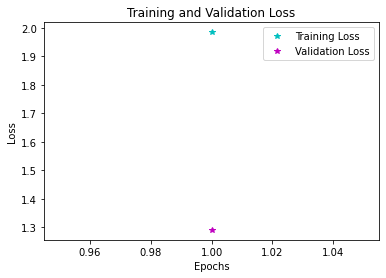

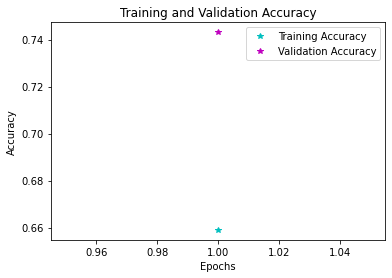

In [15]:
plot_accuracy_and_loss(model_history, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

### Without Early Stopping 

In [16]:
model_history_1, model_1 = keras_pipeline_neural_net(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l1(0.001),
                          optimizers.RMSprop(lr=0.001))

Test Loss and Accuracy
782/782 [==============================] - 1s 1ms/step - loss: 0.6583 - binary_accuracy: 0.8595
Predictions ===> [[0.09435755]
 [0.99354064]
 [0.69264275]
 ...
 [0.03789556]
 [0.05149624]
 [0.44814032]]


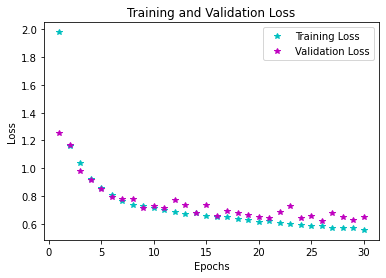

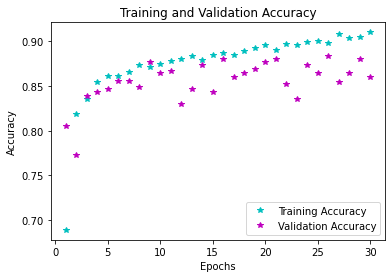

In [17]:
plot_accuracy_and_loss(model_history_1, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

# Conclusions: 
* With early stopping, the result was given really fast
* With early stopping, the accuracy on the validation dataset was 0.7477 and loss was 1.2920 
* Without early stopping, the accuracy on the validation dataset was 0.8595 and loss was 0.6583
* In this test, the better result was for model without early stopping  

### Add batch normalization layer 
try two different batch sizes, epsilon = 0.001, before and after actiovation function 

In [18]:
def keras_pipeline_neural_net_bn(x_train,
                              y_train,
                              x_validation,
                              y_validation,
                              regularizer,
                              optimizers,
                              NumEpochs = 30,
                              BatchSize = 500,
                              metrics=[metrics.binary_accuracy],
                              loss=losses.binary_crossentropy,
                              verbose=0):    
    
    # Define model
    model = Sequential()

    layer1 = Dense(32,
                   activation='relu',
                   kernel_regularizer=regularizer,
                   input_shape=(10000,)) 
    model.add(layer1)
    model.add(BatchNormalization(epsilon=0.001))

    layer2 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer2)
    model.add(BatchNormalization(epsilon=0.001))    
    
    layer3 = Dense(64,
                   kernel_regularizer=regularizer,
                   activation='relu'); 
    model.add(layer3)
    model.add(BatchNormalization(epsilon=0.001))
    
    output_layer = Dense(1,
                         activation='sigmoid')
    model.add(output_layer)

    # Compile model
    model.compile(optimizer=optimizers,
                  loss=loss,
                  metrics=metrics)

    # Fit model
    history = model.fit(x_train,
                        y_train,
                        epochs=NumEpochs,
                        batch_size=BatchSize,
                        verbose=verbose,
                        validation_data=(x_validation, y_validation))

    # Evaluate model
    print("Test Loss and Accuracy")
    results = model.evaluate(x_test, y_test, verbose=1)

    #Make predictions
    print("Predictions ===> " + str(model.predict(x_test)))
    
    return history, model

### Batch normalization after activation function with batch size 500

In [19]:
model_history_2, model_2 = keras_pipeline_neural_net_bn(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l2(0.001),
                          optimizers.RMSprop(lr=0.001),
                          BatchSize = 500)

Test Loss and Accuracy
782/782 [==============================] - 2s 2ms/step - loss: 0.8328 - binary_accuracy: 0.8390
Predictions ===> [[8.5395575e-02]
 [9.9999678e-01]
 [9.9988574e-01]
 ...
 [1.6245246e-04]
 [2.1401346e-03]
 [9.9914229e-01]]


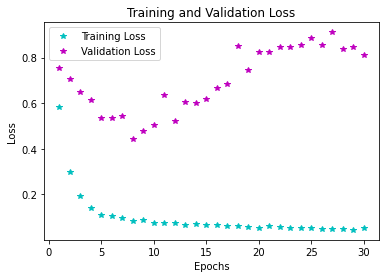

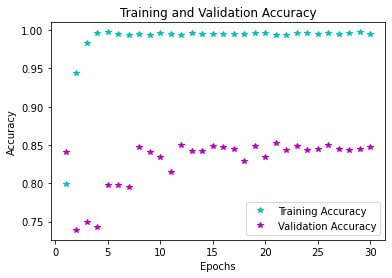

In [20]:
plot_accuracy_and_loss(model_history_2, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

### Batch normalization after activation function with batch size 1000

In [91]:
model_history_3, model_3 = keras_pipeline_neural_net_bn(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l1(0.01),
                          optimizers.RMSprop(lr=0.001),
                          BatchSize = 1000)

Test Loss and Accuracy
782/782 [==============================] - 5s 3ms/step - loss: 2.4570 - binary_accuracy: 0.8563
Predictions ===> [[0.39824253]
 [0.62722576]
 [0.5908866 ]
 ...
 [0.389246  ]
 [0.3880143 ]
 [0.5704928 ]]


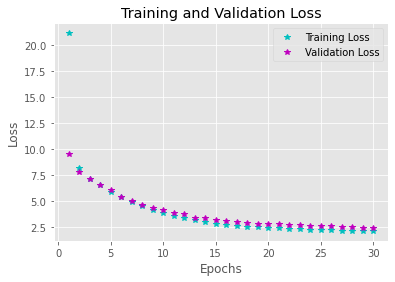

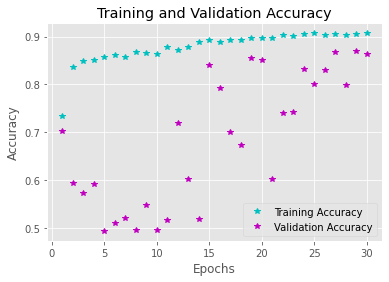

In [92]:
plot_accuracy_and_loss(model_history_3, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

In [21]:
def keras_pipeline_neural_net_bn_after_activation_fn(x_train,
                              y_train,
                              x_validation,
                              y_validation,
                              regularizer,
                              optimizers,
                              NumEpochs = 30,
                              BatchSize = 500,
                              metrics=[metrics.binary_accuracy],
                              loss=losses.binary_crossentropy,
                              verbose=0):    
    
    # Define model
    model = Sequential()

    layer1 = Dense(32,
                   kernel_regularizer=regularizer,
                   input_shape=(10000,)) 
    model.add(layer1)
    model.add(BatchNormalization(epsilon=0.001))
    model.add(Activation('relu'))
    
    layer2 = Dense(64,
                   kernel_regularizer=regularizer); 
    model.add(layer2)
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
    
    layer3 = Dense(64,
                   kernel_regularizer=regularizer); 
    model.add(layer3)
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    output_layer = Dense(1,
                         activation='sigmoid')
    model.add(output_layer)

    # Compile model
    model.compile(optimizer=optimizers,
                  loss=loss,
                  metrics=metrics)

    # Fit model
    history = model.fit(x_train,
                        y_train,
                        epochs=NumEpochs,
                        batch_size=BatchSize,
                        verbose=verbose,
                        validation_data=(x_validation, y_validation))

    # Evaluate model
    print("Test Loss and Accuracy")
    results = model.evaluate(x_test, y_test, verbose=1)

    #Make predictions
    print("Predictions ===> " + str(model.predict(x_test)))
    
    return history, model

### Batch normalization before activation function with batch size 500

In [22]:
model_history_4, model_4 = keras_pipeline_neural_net_bn_after_activation_fn(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l2(0.01),
                          optimizers.RMSprop(lr=0.001),
                          BatchSize = 500)

Test Loss and Accuracy
782/782 [==============================] - 2s 2ms/step - loss: 1.1437 - binary_accuracy: 0.8089
Predictions ===> [[1.00026984e-04]
 [9.99996841e-01]
 [9.23530459e-01]
 ...
 [1.19893259e-04]
 [4.10079956e-04]
 [2.97442079e-03]]


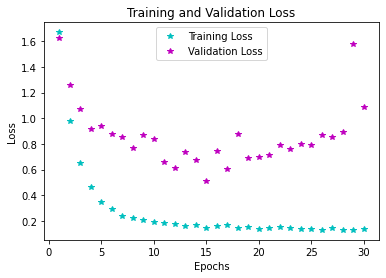

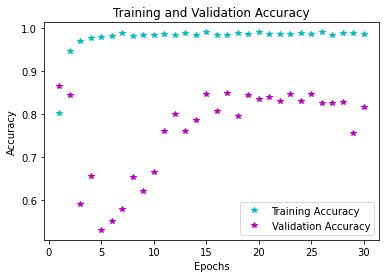

In [23]:
plot_accuracy_and_loss(model_history_4, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

### Batch normalization before activation function with batch size 1000

In [24]:
model_history_5, model_5 = keras_pipeline_neural_net_bn_after_activation_fn(x_train,
                          y_train,
                          x_valdation,
                          y_valdation,
                          regularizers.l1(0.05),
                          optimizers.RMSprop(lr=0.001),
                          BatchSize = 1000)

Test Loss and Accuracy
782/782 [==============================] - 2s 2ms/step - loss: 8.8905 - binary_accuracy: 0.8225
Predictions ===> [[0.4870931 ]
 [0.5741871 ]
 [0.4784305 ]
 ...
 [0.4546063 ]
 [0.44536018]
 [0.47089714]]


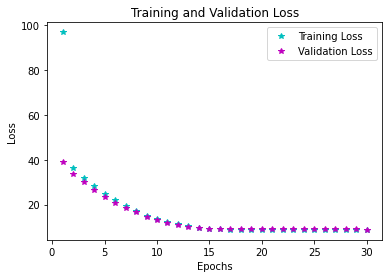

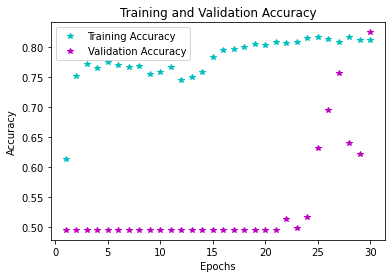

In [25]:
plot_accuracy_and_loss(model_history_5, 
                           metrics_labels = ['binary_accuracy', 'val_binary_accuracy'],
                           loss_labels = ['loss', 'val_loss'])

### Conclusions: 

* For batch normalization after activation function with batch size 500 result was: 
loss: 0.8328,  accuracy: 0.8390
* For batch normalization after activation function with batch size 1000 result was: 
loss: 2.4570, accuracy: 0.8563

The accuracy for batch size 1000 is higher, but the loss is bigger. 

* For batch normalization before activation function with batch size 500 result was: 
loss: 1.1437, accuracy: 0.8089
* For batch normalization before activation function with batch size 1000 result was: 
loss: 8.8905, accuracy: 0.8225

The accuracy for batch size 1000 is higher, but the loss is bigger. 

Batch normalization has a better result, when we set it after activation function. 